In [15]:
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D
from keras.layers import Dropout,Flatten
import matplotlib.pyplot as plt

In [2]:
def show_train_history(trainHistory, train, validation):
    plt.plot(trainHistory.history[train])
    plt.plot(trainHistory.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [7]:
root_dir = os.path.abspath(r'D:/datahack/')
data_dir = os.path.join(root_dir, 'digit')
# check for existence
os.path.exists(root_dir) & os.path.exists(data_dir)

True

In [8]:
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

In [9]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)    
train_x = np.stack(temp)
train_x /= 255.0 
#train_x = train_x.reshape(-1, 784).astype('float32')
train_x = train_x.reshape(train_x.shape[0], 1, 28, 28) #for conv2d
train_y = keras.utils.np_utils.to_categorical(train.label.values)

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)    
test_x = np.stack(temp)
test_x /= 255.0
#test_x = test_x.reshape(-1, 784).astype('float32') 
test_x = test_x.reshape(test_x.shape[0], 1, 28, 28) #for conv2d

In [12]:
#add model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 26, 26)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 13, 26)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 11, 64)        15040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2240)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               286848    
__________

In [13]:
#training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trainHistory = model.fit(x=train_x, y=train_y, validation_split=0.1, epochs=20, batch_size=128, verbose=1)

Train on 44100 samples, validate on 4900 samples
Epoch 1/20
44100/44100 [==============================] - 47s - loss: 0.5014 - acc: 0.8430 - val_loss: 0.1327 - val_acc: 0.9610
Epoch 2/20
44100/44100 [==============================] - 46s - loss: 0.1763 - acc: 0.9463 - val_loss: 0.0918 - val_acc: 0.9692
Epoch 3/20
44100/44100 [==============================] - 47s - loss: 0.1380 - acc: 0.9572 - val_loss: 0.0695 - val_acc: 0.9757
Epoch 4/20
44100/44100 [==============================] - 47s - loss: 0.1172 - acc: 0.9637 - val_loss: 0.0653 - val_acc: 0.9784
Epoch 5/20
44100/44100 [==============================] - 46s - loss: 0.1015 - acc: 0.9691 - val_loss: 0.0547 - val_acc: 0.9816
Epoch 6/20
44100/44100 [==============================] - 46s - loss: 0.0909 - acc: 0.9711 - val_loss: 0.0533 - val_acc: 0.9816
Epoch 7/20
44100/44100 [==============================] - 46s - loss: 0.0805 - acc: 0.9753 - val_loss: 0.0549 - val_acc: 0.9820
Epoch 8/20
44100/44100 [==============================]

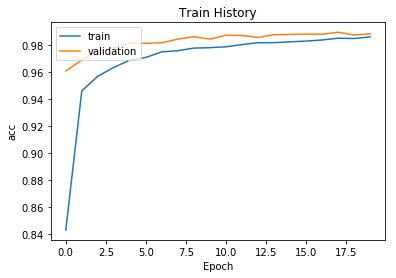

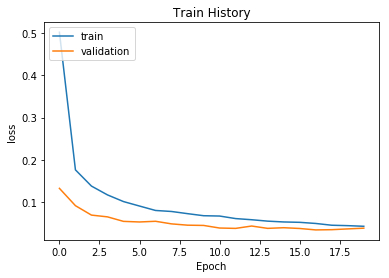

In [16]:
show_train_history(trainHistory, 'acc', 'val_acc')
show_train_history(trainHistory, 'loss', 'val_loss')

In [17]:
#predict
pred = model.predict_classes(test_x)
filename = test['filename']
rs = pd.DataFrame(filename)
rs = rs.assign(label =pred)
rs.to_csv('sample_submission.csv',index=None)

20992/21000 [============================>.] - ETA: 0s